# EDA: Flujo de Machine Learning
---

### 1. Obtencion del Conjunto de Datos

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('/workspaces/P14-machine-learning-python-template/data/raw/AB_NYC_2019.csv')
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2. Comprension del Dataset y Limpieza de Valores Duplicados

In [32]:
#Comprension de las variables y tipos de datos presentes
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

In [33]:
#Verificacion de la cantidad de valores nulos por columna
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [34]:
#Verificacion de valores unicos del Dataset
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [35]:
# Totalizacion de Duplicados
df.duplicated().sum()

np.int64(0)

In [36]:
#Eliminacion de informacion irrelevante, valores nulos y simplificacion de nombres
df.drop(['id','name','host_name','reviews_per_month', 'last_review'], axis=1, inplace=True)
df.rename(columns={'neighbourhood_group': 'district'}, inplace=True)
df.head()



,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### 3. Analisis Univariante

##### 3.1 Analisis Univariante Categorico

In [37]:
#Clasificamos las variables Categoricas y las Numericas del Dataset
df_numericals = df.select_dtypes(include = 'number').columns
df_categorical = df.select_dtypes(include = 'str').columns

print(df_numericals)
print(df_categorical)

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='str')
Index(['district', 'neighbourhood', 'room_type'], dtype='str')


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0.5, '')]

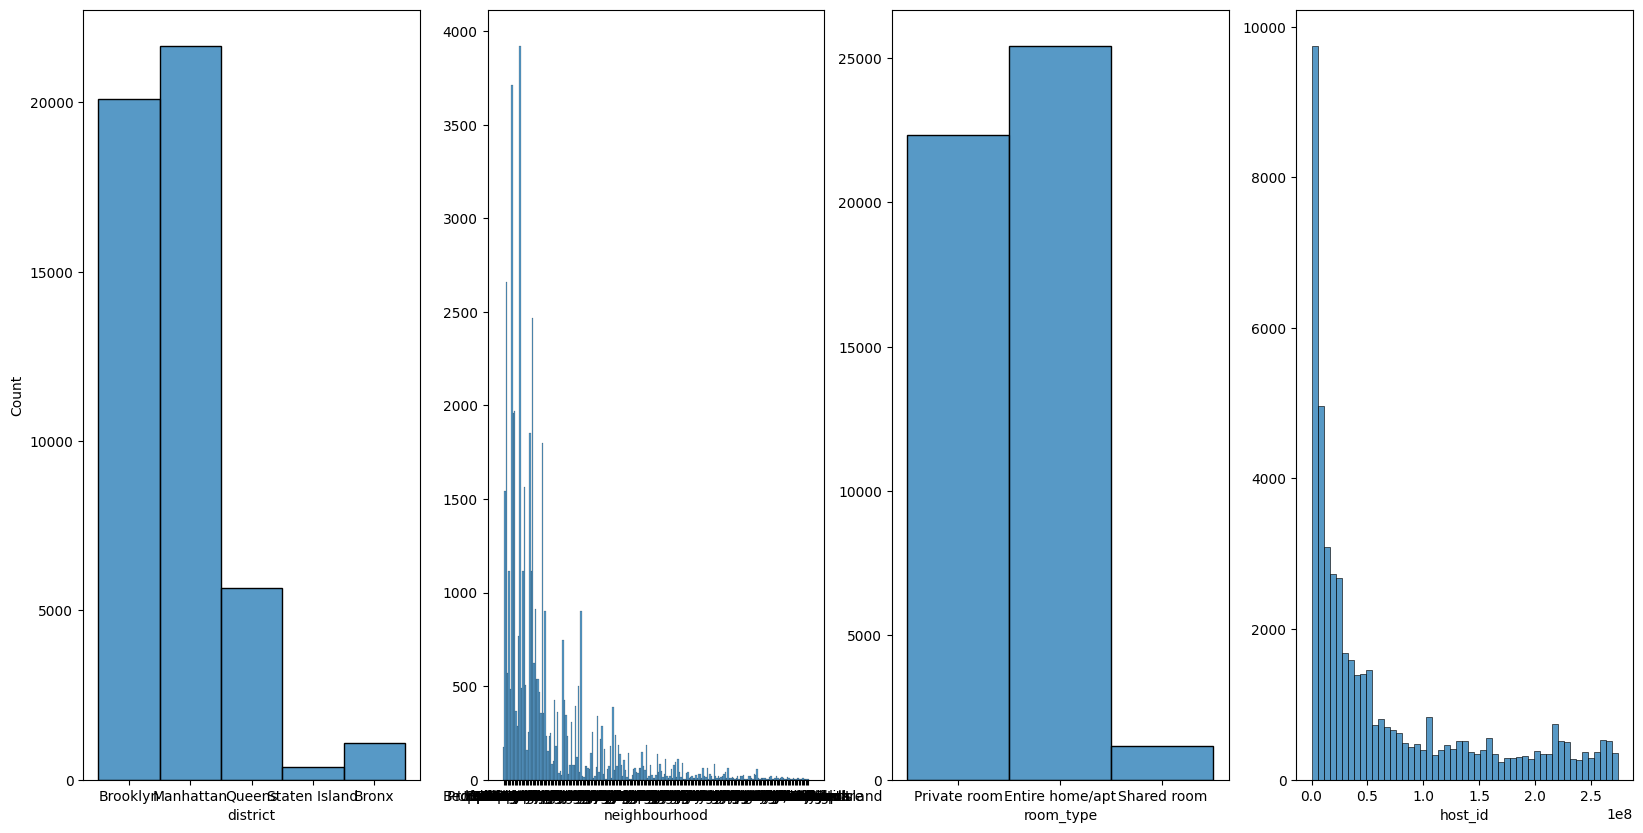

In [39]:
#Visualizacion de Tendencias de las Variables Categoricas

fig, axis = plt.subplots(1, 4, figsize=(20,10))

sns.histplot(ax = axis[0], data = df, x= 'district')
sns.histplot(ax = axis[1], data = df, x= 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x= 'room_type').set(ylabel = None)
sns.histplot(ax = axis[3], data = df, x= 'host_id').set(ylabel = None)


##### 3.2 Analisis Univariante Numerico

<Axes: xlabel='number_of_reviews'>

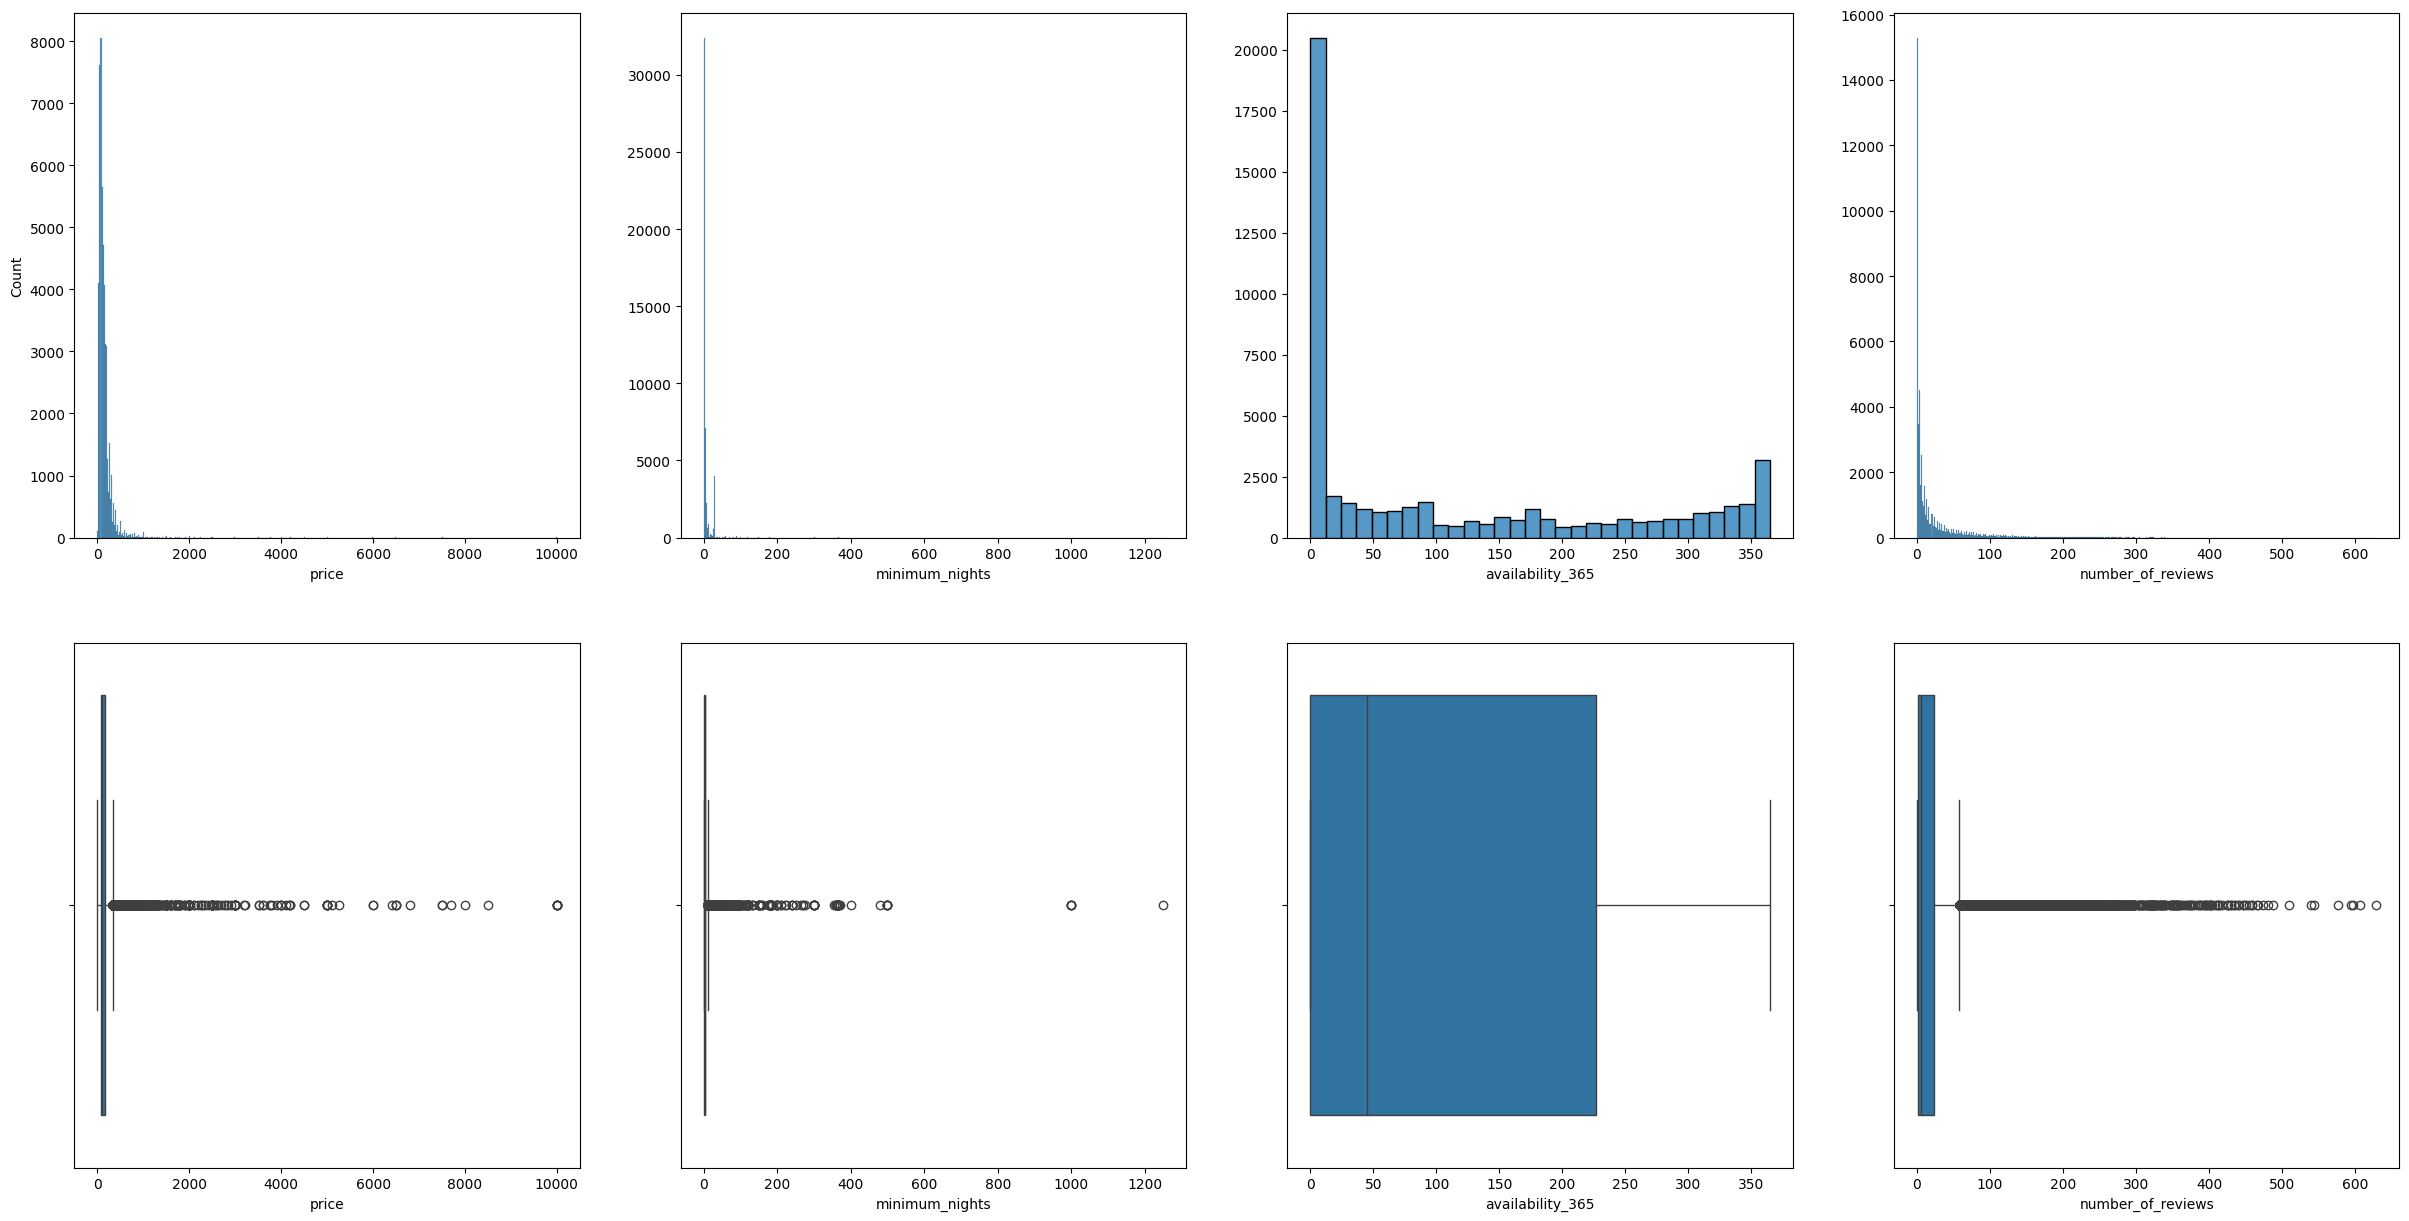

In [40]:
#Visualizacion de Tendencias y Outliers de Variables Numericas

fig, axis = plt.subplots(2,4, figsize = (30,15))

sns.histplot(ax = axis[0,0], data= df, x='price')
sns.boxplot(ax = axis[1,0], data= df, x= 'price')

sns.histplot(ax = axis[0,1], data= df, x='minimum_nights').set(ylabel=None)
sns.boxplot(ax = axis[1,1], data= df, x= 'minimum_nights')

sns.histplot(ax = axis[0,2], data= df, x='availability_365').set(ylabel=None)
sns.boxplot(ax = axis[1,2], data= df, x= 'availability_365')

sns.histplot(ax = axis[0,3], data= df, x='number_of_reviews').set(ylabel=None)
sns.boxplot(ax = axis[1,3], data= df, x= 'number_of_reviews')

## 4. Analsis Multivariante
---

#### 4.1. Analisis Multivariante Categorico

<Axes: xlabel='district', ylabel='count'>

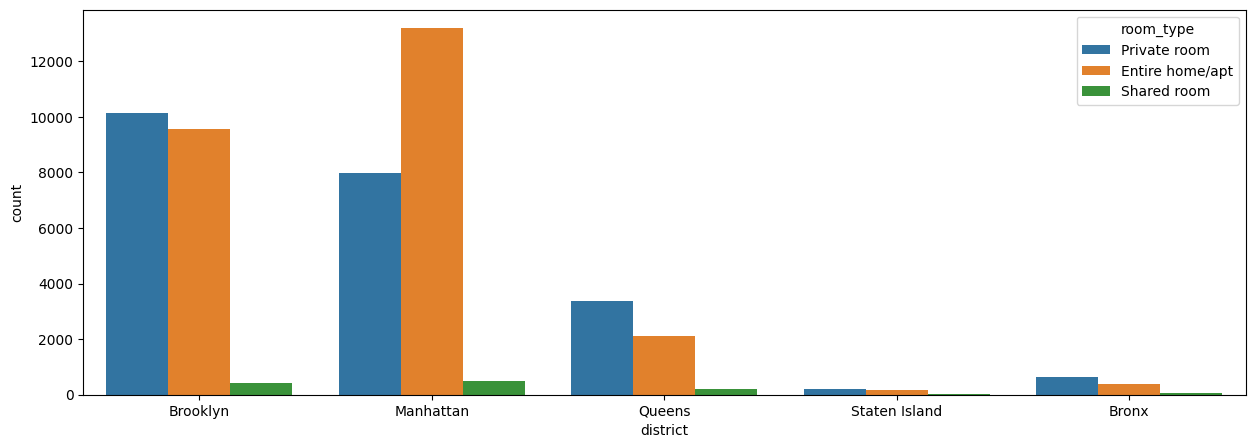

In [41]:
fig, axis = plt.subplots(figsize= (15,5))

sns.countplot(data = df, x='district', hue='room_type')


##### 4.2 Analisis Multivariante Numerico

<Axes: >

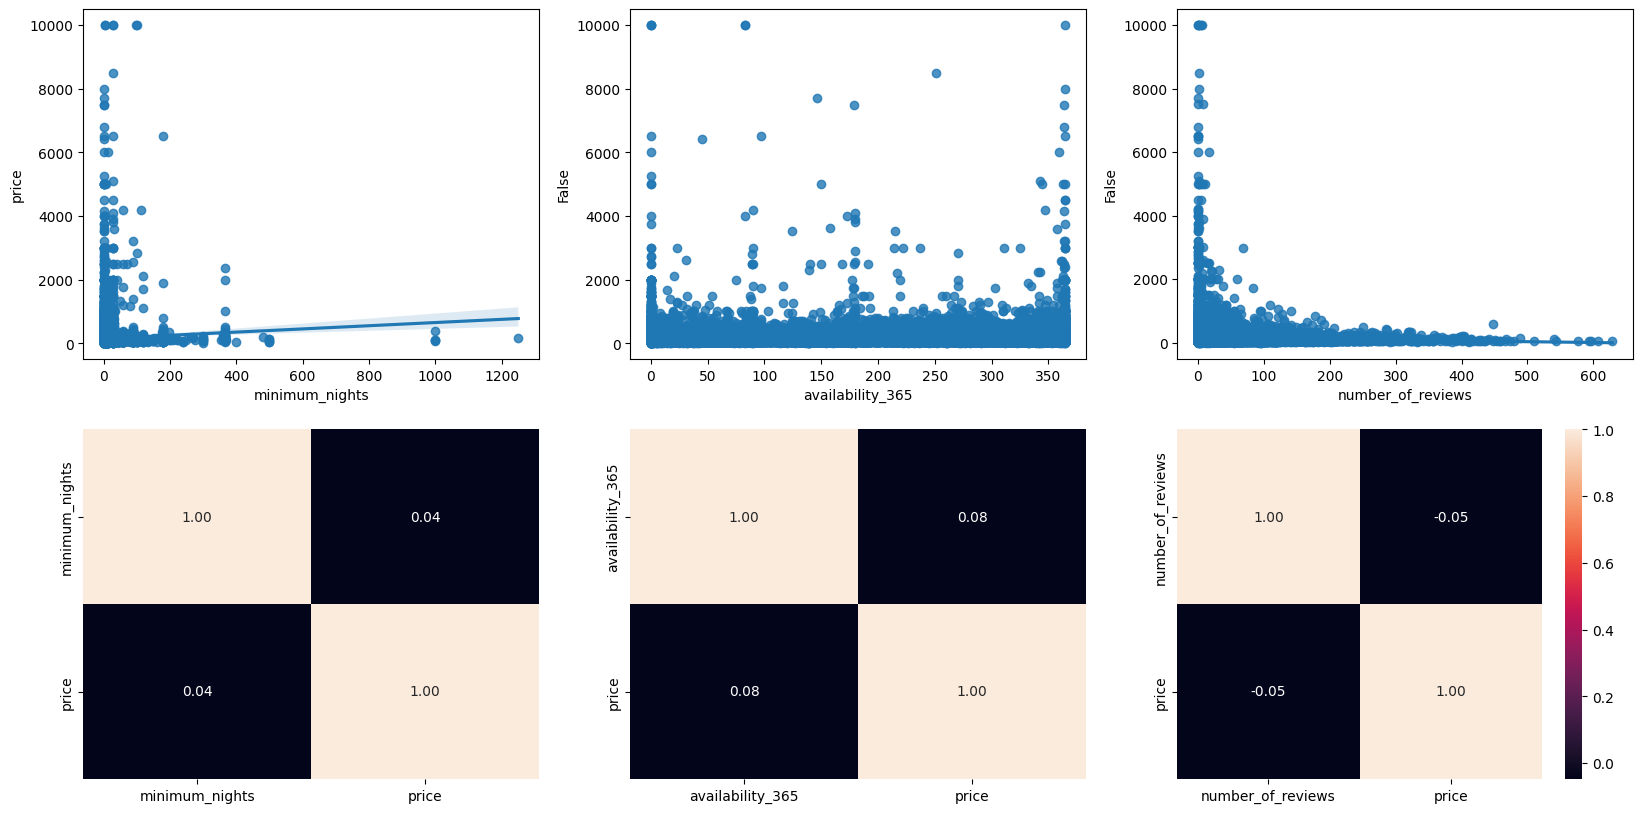

In [42]:
fig, axis = plt.subplots(2,3, figsize=(20,10))

sns.regplot(ax = axis[0,0], data= df, x='minimum_nights', y='price')
sns.heatmap(df[['minimum_nights','price']].corr(), annot = True, fmt = '.2f', cbar= False, ax = axis[1,0])

sns.regplot(ax = axis[0,1], data= df, x='availability_365', y='price').set(ylabel=False)
sns.heatmap(df[['availability_365','price']].corr(), annot = True, fmt = '.2f', cbar= False, ax= axis[1,1])

sns.regplot(ax = axis[0,2], data= df, x='number_of_reviews', y='price').set(ylabel=False)
sns.heatmap(df[['number_of_reviews','price']].corr(), annot = True, fmt = '.2f', cbar= True, ax = axis[1,2])


#### 4.3 Analisis Multivariante Numerico-Categorico

In [43]:
df['district'] = pd.factorize(df['district'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]
df['room_type'] = pd.factorize(df['room_type'])[0]

df.columns

Index(['host_id', 'district', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='str')

<Axes: >

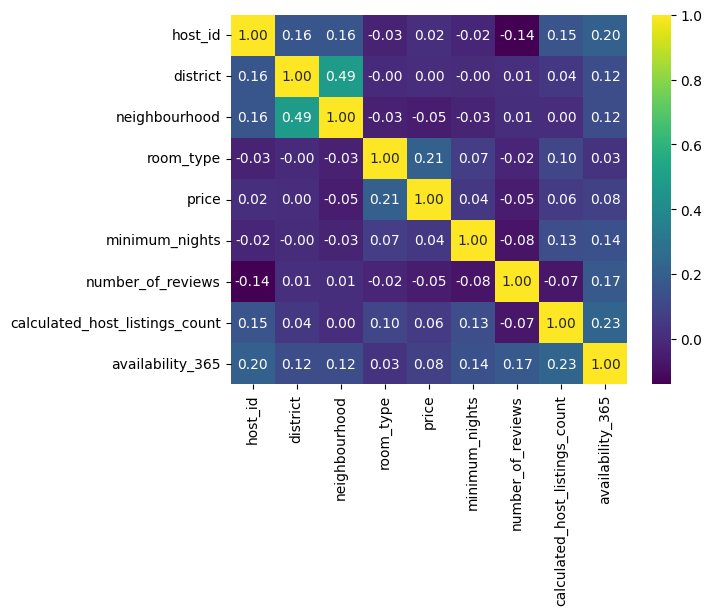

In [44]:
fig = plt.plot(figsize=(30,30))
sns.heatmap(df[['host_id','district','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].corr(), annot = True, fmt = '.2f', cmap= 'viridis')


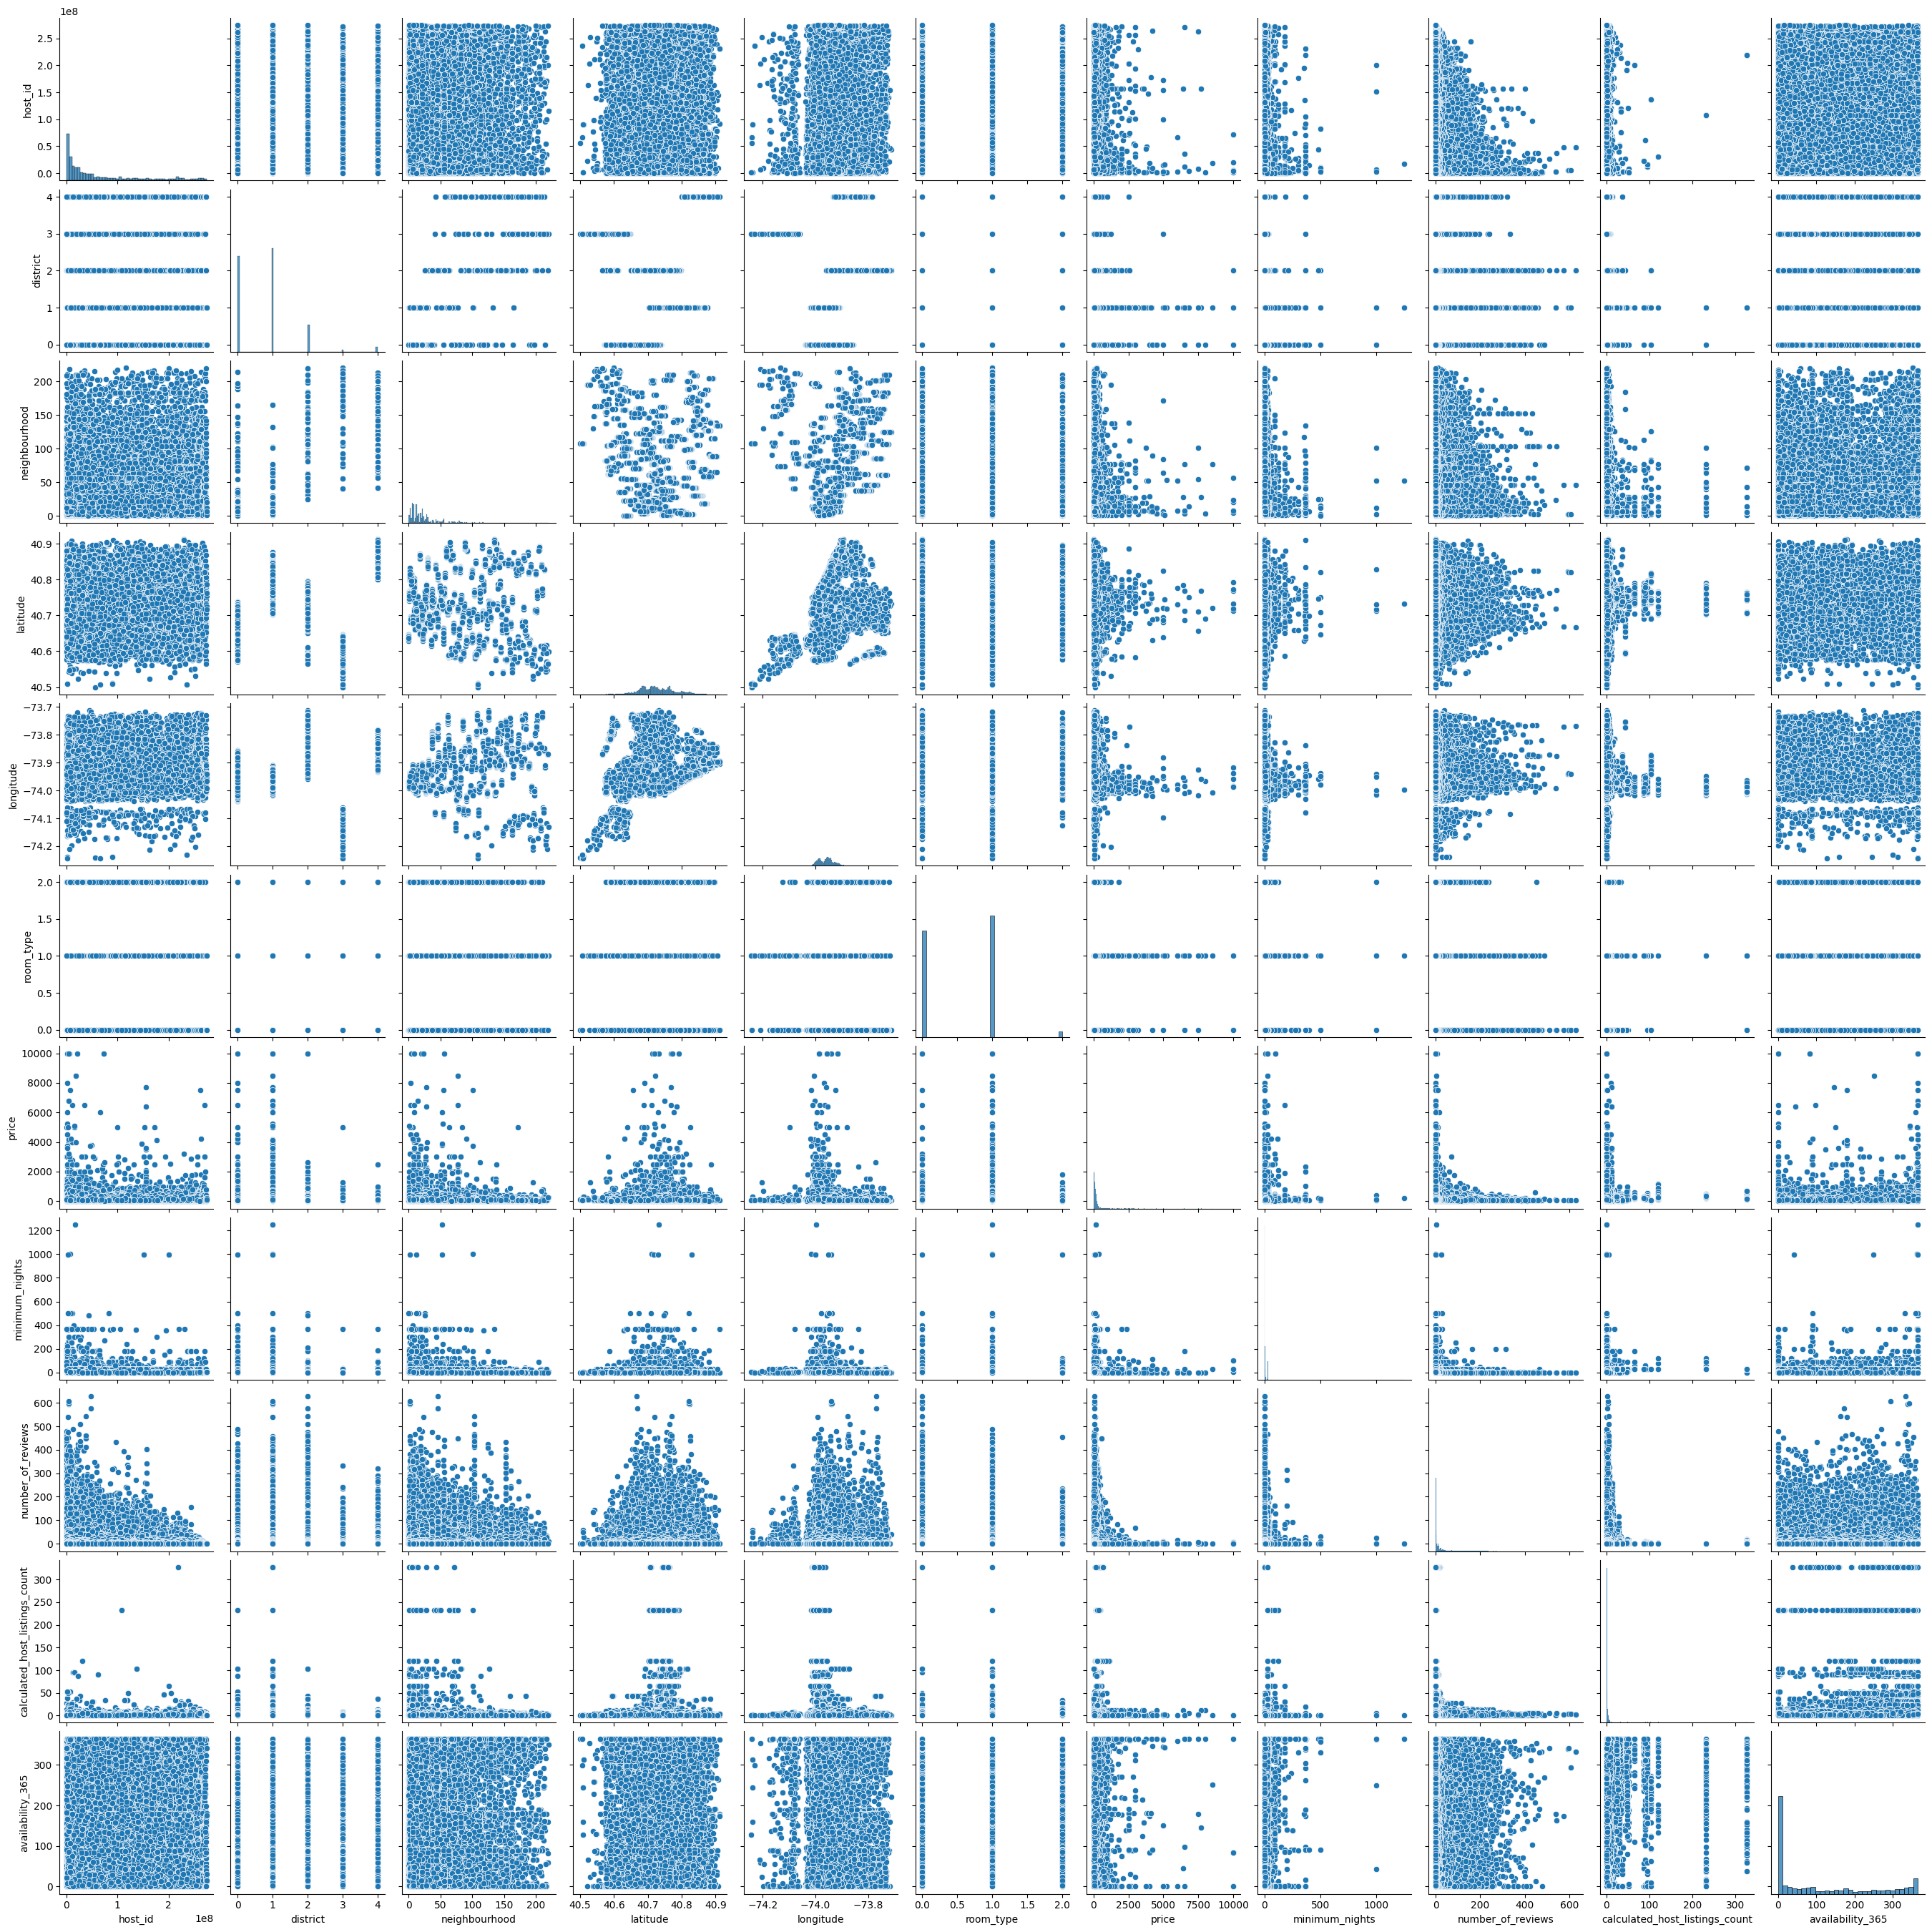

In [45]:
sns.pairplot(data= df)

## 5. Ingenieria de Caracteristicas

#### 5.1 Revision Estadistica y Tratamiento de Outliers en Variables Importantes

In [46]:
df.describe()

,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


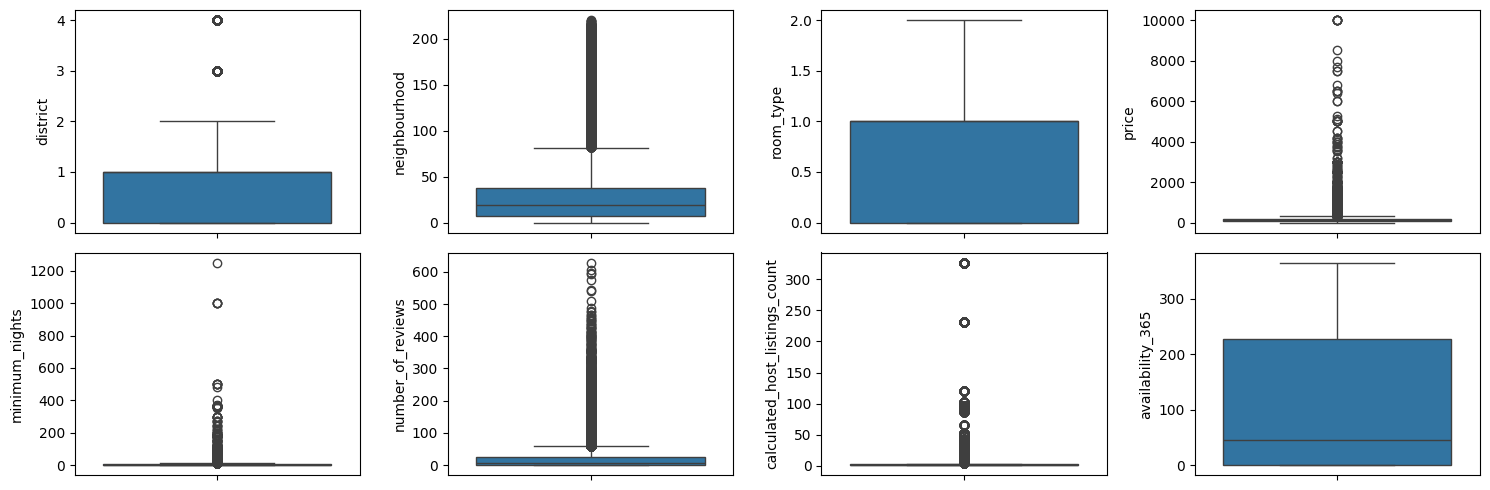

In [47]:
#Deteccion de Outliers
fig, axis = plt.subplots(2,4, figsize=(15,5))

sns.boxplot(ax=axis[0,0], data= df, y= 'district') #1
sns.boxplot(ax=axis[0,1], data= df, y= 'neighbourhood') #2
sns.boxplot(ax=axis[0,2], data= df, y= 'room_type') #3
sns.boxplot(ax=axis[0,3], data= df, y= 'price') #4
sns.boxplot(ax=axis[1,0], data= df, y= 'minimum_nights') #5
sns.boxplot(ax=axis[1,1], data= df, y= 'number_of_reviews') #6
sns.boxplot(ax=axis[1,2], data= df, y= 'calculated_host_listings_count') #7
sns.boxplot(ax=axis[1,3], data= df, y= 'availability_365') #8

plt.tight_layout()

plt.show()


In [48]:
# Estadisticas de los precios
price_stats = df['price'].describe()
price_stats



count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [49]:
#Calculo de los limites superiores e inferiores
iqr = price_stats['75%'] - price_stats['25%']
upper = price_stats['75%'] + 1.5*iqr
lower = price_stats['25%'] - 1.5*iqr

print(f'El limite superior para los precios de los Airbnb en NY es', upper, 'mientras que el limite inferior es de', lower, 'con un rango intercuartilico de', iqr)



El limite superior para los precios de los Airbnb en NY es 334.0 mientras que el limite inferior es de -90.0 con un rango intercuartilico de 106.0


In [50]:
#Se filtran todos los precios superiores a USD 400 ya que el 75% de ellos se encuentra en USD 175

#Se evaluan la cantidad de alquileres por encima de USD 400
pricef = df[df['price'] > 400]
pricef.describe()


,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.763000e+03,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,9.014557e+07,0.841180,24.422008,40.734731,-73.975606,0.884288,856.238230,8.515598,12.448667,14.272830,178.334090
std,9.215232e+07,0.563519,28.291534,0.040173,0.035188,0.340590,960.835911,24.520675,28.384582,54.450176,140.930623
min,8.730000e+03,0.000000,0.000000,40.530760,-74.202950,0.000000,402.000000,1.000000,0.000000,1.000000,0.000000
25%,9.457764e+06,1.000000,7.000000,40.715570,-73.996115,1.000000,495.000000,1.000000,0.000000,1.000000,19.000000
50%,4.876260e+07,1.000000,14.000000,40.738040,-73.981740,1.000000,595.000000,3.000000,2.000000,1.000000,179.000000
75%,1.769805e+08,1.000000,29.000000,40.760065,-73.964315,1.000000,800.000000,5.000000,11.000000,3.000000,327.000000
max,2.740800e+08,4.000000,213.000000,40.886710,-73.739700,2.000000,10000.000000,365.000000,447.000000,327.000000,365.000000


<Axes: ylabel='price'>

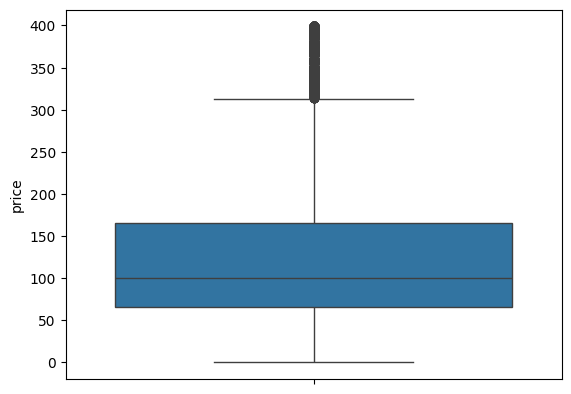

In [51]:
#Se filtra el nuevo DataFrame con aquellos alquileres por debajo de USD 400

df = df[df['price']< 400]
df.describe()

sns.boxplot(data=df, y='price')

#### 5.1 Escalado de Valores

In [52]:
from sklearn.preprocessing import MinMaxScaler

dfnum = ['room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count','availability_365']

#Se emplea el MinMaxScaler debido a que con el StandardScaler se obtienen valores negativos que no permiten emplear la Seleccion de Caracteristicas con KBest
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df[dfnum])
dfscaled = pd.DataFrame(scaled_features, index= df.index, columns= dfnum)

dfscaled['price'] = df['price']
dfscaled.head()

,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,0.0,0.000000,0.014308,0.015337,1.000000,149
1,0.5,0.000000,0.071542,0.003067,0.972603,225
2,0.0,0.001601,0.000000,0.000000,1.000000,150
3,0.5,0.000000,0.429253,0.000000,0.531507,89
4,0.5,0.007206,0.014308,0.000000,0.000000,80


#### 6. Seleccion de Caracteristicas

In [53]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = dfscaled.drop('price', axis=1)
y = dfscaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

Kbest = SelectKBest(chi2, k=4)
Kbest.fit(X_train, y_train)

selected_features = X_train.columns[Kbest.get_support()]


print(selected_features)
X_train.head()


Index(['room_type', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='str')


,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
19534,0.5,0.003203,0.039746,0.000000,0.016438
1376,0.0,0.015212,0.170111,0.000000,0.394521
19956,0.5,0.023219,0.004769,0.018405,0.010959
39517,0.0,0.000000,0.007949,0.000000,0.221918
45495,0.5,0.002402,0.000000,0.000000,0.868493


In [54]:
i = Kbest.get_support()
print(i)

[ True False  True  True  True]


In [55]:
X_train_sel = pd.DataFrame(Kbest.transform(X_train), columns= X_train.columns.values[i])
X_test_sel = pd.DataFrame(Kbest.transform(X_test), columns= X_test.columns.values[i])

X_train.head()

,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
19534,0.5,0.003203,0.039746,0.000000,0.016438
1376,0.0,0.015212,0.170111,0.000000,0.394521
19956,0.5,0.023219,0.004769,0.018405,0.010959
39517,0.0,0.000000,0.007949,0.000000,0.221918
45495,0.5,0.002402,0.000000,0.000000,0.868493


In [56]:
#Concatenamos el Conjunto de Datos nuevamente para guardarlo.

X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)

X_train_sel.to_csv('../data/processed/trained.csv')
X_test_sel.to_csv('../data/processed/test.csv')

X_train_sel.head()

,room_type,number_of_reviews,calculated_host_listings_count,availability_365,price
0,0.5,0.039746,0.000000,0.016438,75
1,0.0,0.170111,0.000000,0.394521,120
2,0.5,0.004769,0.018405,0.010959,250
3,0.0,0.007949,0.000000,0.221918,70
4,0.5,0.000000,0.000000,0.868493,225
